Узнаем текущую версию и по необходимости обновляем ее

In [1]:
from platform import python_version

In [2]:
print(python_version())

3.9.16


In [3]:
!python -V

Python 3.9.16


Импортируем нужные библиотеки:

In [4]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, \
    kendalltau, f_oneway, kruskal

Версии пакетов, используемых в этом Jupiter Netbook

In [5]:
!pip install -q -U watermark

In [6]:
%reload_ext watermark
%watermark
%watermark -a "PAVEL KNJAZKOV" --iversions

Last updated: 2023-06-26T22:47:52.007994+03:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Author: PAVEL KNJAZKOV

pandas     : 1.5.3
seaborn    : 0.12.2
matplotlib : 3.7.1
statsmodels: 0.13.5
numpy      : 1.24.3



# **Анализ** **исследования:**


Урок 9. 

Python применение продвинутых методов

Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

## 1. О кошках и печеньях
<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> это чрезвычайно популярная мобильная игра-головоломка, разработанная компанией <a href="http://tactile.dk">Tactile Entertainment</a>. Это классическая игра-головоломка в стиле "соедини три", в которой игрок должен соединить плитки одного цвета, чтобы очистить игровое поле и выиграть уровень.Ознакомится с короткой демонстрацией можно здесь: </p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>По мере прохождения уровней игры игроки время от времени будут сталкиваться с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупку в приложении, чтобы пройти дальше. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, возможно, приводит к увеличению и продлению удовольствия игрока от игры.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>
<p>Но где должны быть расположены ворота? Изначально первые врата были установлены на 30-м уровне, но в этом исследовании мы собираемся проанализировать AB-тест, в котором  первые  врата были перемещены Cookie Cats с 30-го на 40-й уровень. В частности, мы рассмотрим влияние на удержание игроков. Но прежде чем мы перейдем к этому, ключевым шагом перед проведением любого анализа является понимание данных. Итак, давайте загрузим его и взглянем!</p>

In [7]:
# Чтение данных
df = pd.read_csv('результаты А_B - cookie_cats 2.csv')

# Выводим первые 5-ть и последние 5-ть строк
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


In [8]:
# Функция info() предоставляет суммарную информацию о нашем Dataframe.
# Получим информацию о количестве строк, наименовании столбцов, количестве непустых строк в них, 
# типе данных в каждом столбце, а также столько памяти занимает Dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [9]:
def check_df(dataframe, head=5):
    print("########## Info #############")
    print(dataframe.info())
    print("########## Shape #############")
    print(dataframe.shape)
    print("########## Data Types #############")
    print(dataframe.dtypes)
    print("########## Head of Data #############")
    print(dataframe.head(head))
    print("########## Tail of Data #############")
    print(dataframe.tail(head))
    print("########## Null Values of Data #############")
    print(dataframe.isnull().sum())
    print("########## Describe of the Numerical Datas #############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB
None
########## Shape #############
(90189, 5)
########## Data Types #############
userid             int64
version           object
sum_gamerounds     int64
retention_1        int64
retention_7        int64
dtype: object
########## Head of Data #############
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3            0            0
1     337  gate_30              38            1            0
2     377  gate_40             165            1            0


In [10]:
# кол-во строк и столбцов, сошлось...) на лекции была команда data.shape и data.info() - не работает!!!
df.shape

(90189, 5)

In [11]:
# взглянуть на описательную статистику числовых данных: на лекции была команда data.describe() - не работает!!!
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [12]:
# проверим кол-во нулевых значений
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Согласно быстрому анализу данных, в наборе данных нет нулевых данных, и все идентификаторы пользователей используются по отдельности.

**Подготовка данных:**

На этом этапе, если в наборе данных есть нулевые значения, то они удалятся из данных.

In [13]:
# Команда dropna() поможет удалить нулевые значения из данных.

df.shape
df.isnull().sum()
df.dropna(inplace = True)

# Для проверки данных

df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,90189.0,4.998412e+06,2.883286e+06,116.0,2512230.0,4995815.0,7496452.0,9999861.0
sum_gamerounds,90189.0,5.187246e+01,1.950509e+02,0.0,5.0,16.0,51.0,49854.0
retention_1,90189.0,4.452095e-01,4.969917e-01,0.0,0.0,0.0,1.0,1.0
retention_7,90189.0,1.860648e-01,3.891611e-01,0.0,0.0,0.0,0.0,1.0


## 2. Данные АВ теста
<p>Данные, которыми мы располагаем, получены от 90 189 игроков, которые установили игру во время выполнения AB-теста. Переменными являются:</p>
<ul>
<li><code>userid</code> - уникальный номер, который идентифицирует каждого игрока.</li>
<li><code>version</code> - был ли игрок включен в контрольную группу (<code>gate_30</code> - ворота 30 уровня) или в группу с перемещенными воротами (<code>gate_40</code> - ворота 40 уровня).</li>
<li><code>sum_gamerounds</code> - количество раундов, сыгранных каждым игроком в течение первых 14 дней после установки.</li>
<li><code>retention_1</code> - Вернулся ли игрок в игру <strong>через 1 день</strong> после установки?</li>
<li><code>retention_7</code> - Вернулся ли игрок в игру <strong>через 7 дней</strong>  после установки?</li>
</ul>
<p>Когда игрок устанавливал игру, он или она случайным образом назначались либо <code>gate_30</code> либо <code>gate_40</code>. В качестве проверки равномерности распределения посмотрим, есть ли примерно одинаковое количество игроков в каждой группе AB. </p>

In [14]:
# Подсчет количества игроков в каждой группе A_B, через 1 день
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [15]:
# Подсчет количества игроков в каждой группе A_B, через 7 дней
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## 3. Распределение игровых раундов
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>Похоже, что в каждой группе примерно одинаковое количество игроков, отлично!</p>
<p>Основное внимание в этом анализе будет уделено тому, как расположение ворот влияет на удержание игроков, но просто ради интереса: давайте построим график распределения количества игровых раундов, сыгранных игроками в течение их первой недели игры.</p>

In [16]:
plot_df = df.groupby('sum_gamerounds').count().reset_index()
plot_df.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


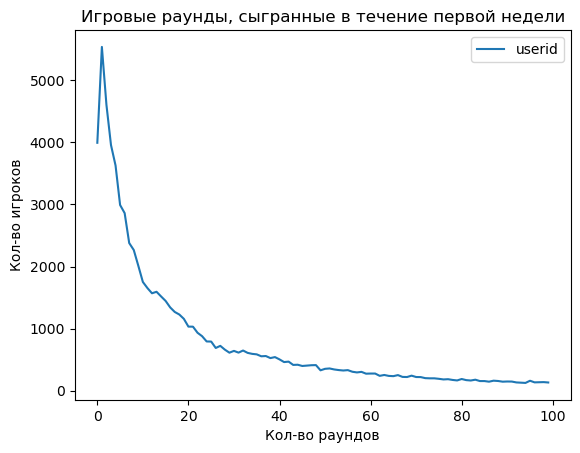

In [17]:
# Эта команда приводит к отображению графиков в notebook
%matplotlib inline

# Подсчет количества игроков для каждого количества раундов игры 
plot_df = df.groupby('sum_gamerounds').count().reset_index()

# Построение графика распределения игроков, сыгравших от 0 до 100 раундов игры
ax = plot_df.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("Кол-во раундов")
ax.set_ylabel("Кол-во игроков")
ax.set_title("Игровые раунды, сыгранные в течение первой недели");

<p>График показывает, что большенство пользователей играет менее 20 раундов.<p><p>Некоторые игроки просто играют пару игровых раундов в первую неделю, а некоторые действительно увлекаются!</p><p>На приведенном выше графике мы также видим, что некоторые игроки устанавливают игру, но затем никогда в нее не играют (0 игровых раундов), Давайте выясним, сколько их всего.<p>



In [18]:
df[df["sum_gamerounds"]== 0]["userid"].count()

3994

<p>3994 игрока никогда не играли в эту игру, просто установили ее. Не слишком ли это много?<p>

<p>Построим гистограммный график различных распределений групп AB. Чтобы получить более детальное представление о низкой и высокой активности пользователей изменим наше распределение выборок.<p>

In [19]:
plt.style.use('ggplot')

Group_A = df[df.version == 'gate_30']
print(Group_A.head())

Group_B = df[df.version == 'gate_40']
print(Group_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


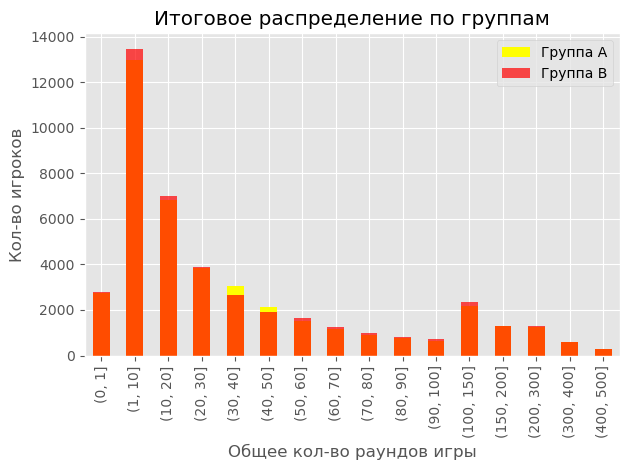

In [20]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'yellow', alpha = 1,
                  title = 'Итоговое распределение по группам')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'red', alpha = 0.7)
ax.set_xlabel('Общее кол-во раундов игры')
ax.set_ylabel('Кол-во игроков')
plt.legend(['Группа A', 'Группа B'])
plt.tight_layout()
plt.grid(True)

<p>Гафик показывает, что между двумя версиями вообщем нет большой разници.
Небольшие различия есть в пределах 30 - 40 сыгранных раундов.<p>

## 4. Общее удержание в течение 1 дня
<p>Чего хочет любой разработчик игры: чтобы игрокам понравилась игра и они подсели на нее. Распространенный в индустрии видеоигр показатель того, насколько увлекательна игра, является - <em>"1-day retention"</em>: это процент игроков, которые возвращаются и играют в игру <em>однажды</em> после того, как они ее установят.  Чем выше срок удержания в течение 1 дня, тем легче удержать игроков и создать большую базу игроков. </p>
<p>В качестве первого шага давайте посмотрим, что такое 1-дневное удержание в целом.</p>
<p>Посмотрим какое удержание в течении 1 дня.<p>

In [21]:
# Процент пользователей, которые вернулись на следующий день после установки
oneday = df.retention_1.sum()/df.retention_1.count()
print(str(oneday*100)+'%')

44.52095044850259%


## 5. "1-day retention" AB-групп
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:200px; float:left"> </p>
<p>Итак, чуть меньше половины игроков (44.52%) возвращаются через день после установки игры. Теперь, когда у нас есть ориентир, сравним, чем отличается 1-дневное удержание в двух группах AB.</p>

<p>В качестве первого шага давайте посмотрим, что такое 1-дневное и 7-дневное удержание в целом.<p>

In [22]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention ratio: {round(df_retention[0],2)}% \
      \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention ratio: 44.52%       
7-days retention ratio: 18.61%


<p>Итак, чуть меньше половины игроков возвращаются через день после установки игры. 18 процентов игроков возвращаются через 7 дней после установки игры.<p><p>Теперь, когда у нас есть ориентир, давайте посмотрим, как различаются показатели удержания в двух группах A / B.<p>

In [23]:
# Вариант 1. Расчет 1-дневного и 7-дневного удержания для каждой группы A/B
df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


In [24]:
# Вариант 2. Расчет 1-дневного удержания для каждой из AB-группы
oneday = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(oneday*100)

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


<p>Наблюдалось небольшое снижение удержания в течение 1 дня, когда ворота были перемещены на 40-й уровень (44,2%) по сравнению с контрольной группой, когда они были на 30-м уровне (44,8%).<p><p>Опять же, наблюдалось снижение 7-дневного удержания, когда ворота были перемещены на 40-й уровень (18,2%) по сравнению с контрольной группой, когда они были на 30-м уровне (19,8%).<p><p>Это небольшое изменение, но даже небольшие изменения в удержании могут оказать большое влияние. Но хотя мы уверены в разнице в данных, насколько мы должны быть уверены в том, что врата на 40-м уровне будут хуже в будущем?<p><p>Для принятия решения воспользуемся Bootstrapp для более детального иследования.<p>

## 6. A/B тест: Bootstrapp

<p>Этапы тестирования:</p>
<ul>
<li>Создание 500 выборок набора данных (начальная загрузка)</li>
<li>Расчет задержек на 1 день и 7 дней для групп A/B</li>
<li>Построение графиков загрузочных дистрибутивов</li>
<li>Расчет разницы в показателях удержания между двумя группами A/B</li>
<li>Вычисление вероятности того, что 1-дневные и 7-дневные задержки будут больше, когда ворота находятся на уровне 30</li>
<li>Оценка результатов и выработка рекомендаций</li>
</ul>

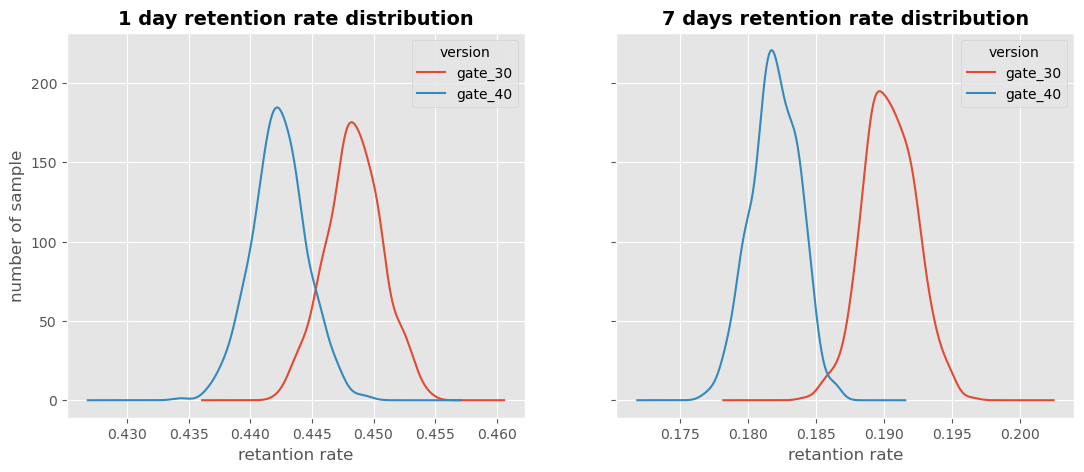

In [25]:
# Создание списка с загрузочными средствами для каждой AB-группы
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# График оценки распределения
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

<p>Эти два распределения, приведенные выше, представляют собой начальную неопределенность в отношении того, каким может быть базовое 1-дневное и 7-дневное удержание для двух групп A / B. Просто взглянув на этот график, мы можем увидеть, что, по-видимому, есть некоторые признаки разницы, хотя и небольшой. Давайте увеличим масштаб различий.<p><p>Обратите внимание, что в этом блокноте мы ограничили количество репликаций bootstrap до 500, чтобы ускорить вычисления.</p>

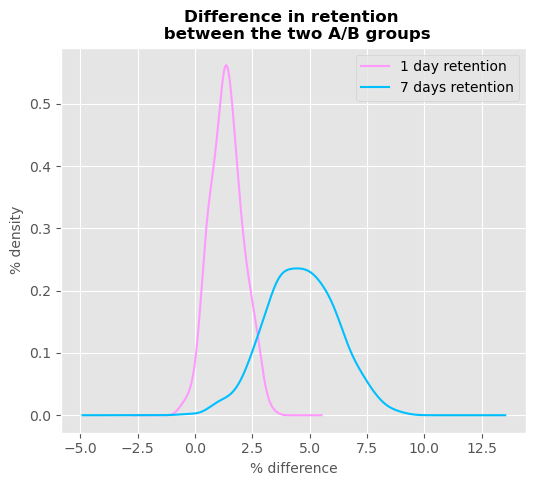

In [26]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c="#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=10)
ax1.set_ylabel("% density",size=10)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=12)
plt.legend()
plt.show()

## 7. Вероятность возникновения разницы
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:200px; float:left"> </p>
<p>Из этих графиков мы можем видеть, что наиболее вероятная разница в процентах составляет около 1% - 2% при удержании в течение 1 дня. При хранении в течение 7 дней наиболее вероятная разница в процентах составляет около 2-5%. Более того, большая часть распределения превышает 0% в пользу врат на 30-м уровне. Но какова вероятность того, что разница превысит 0%? Подсчитаем это.</p>

In [27]:
# Вычисление вероятности того, что задержка на 1 день будет больше, когда ворота находятся на уровне 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Вычисление вероятности того, что 7-дневное удержание будет больше, когда ворота находятся на уровне 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"Вероятность удержания на 1 день выше, когда ворота находятся на уровне 30: {round(prob_1,2)*100}% \
      \nВероятность того, что 7-дневное удержание будет больше, когда ворота находятся на уровне 30: {(prob_7)*100}% ")

Вероятность удержания на 1 день выше, когда ворота находятся на уровне 30: 98.0%       
Вероятность того, что 7-дневное удержание будет больше, когда ворота находятся на уровне 30: 99.8% 


In [28]:
# Вычисление вероятности того, что задержка на 1 день будет больше, когда ворота находятся на уровне 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
print(str(prob*100)+'%')

97.8%


In [29]:
# Вычисление вероятности того, что задержка на 7 день будет больше, когда ворота находятся на уровне 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

99.8%


## 8. Заключение
<p>Результат начальной загрузки говорит нам о том, что есть убедительные доказательства того, что 7-дневное удержание выше, когда ворота находятся на 30-м уровне, чем когда они находятся на 40-м. Вывод таков: если мы хотим сохранить высокий уровень удержания как на 1 день, так и на 7 дней, нам не следует перемещать ворота с 30-го на 40—й уровень. Конечно, есть и другие показатели, на которые мы могли бы обратить внимание, например, количество сыгранных игровых раундов или объем внутриигровых покупок, совершенных двумя AB-группами. Но удержание - один из самых важных показателей. Если мы не сохраним нашу базу игроков, не имеет значения, сколько денег они тратят в игре.</p><p>Итак, почему удержание выше, когда ворота установлены раньше? Можно было бы ожидать обратного: чем позже возникнет препятствие, тем дольше люди будут участвовать в игре. Но это не то, о чем говорят нам данные. Теория гедонистической адаптации может дать этому одно объяснение. Короче говоря, гедонистическая адаптация - это тенденция людей получать все меньше и меньше удовольствия от веселого занятия с течением времени, если это занятие проводится постоянно. Заставляя игроков делать перерыв, когда они добираются до ворот, они продлевают удовольствие от игры. Но когда ворота перемещаются на 40-й уровень, меньшее количество игроков проходит достаточно далеко, и они, скорее всего, выйдут из игры, потому что им это просто наскучило.</p>